# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 11.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 13.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 21.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.9 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp1 # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track) #  (locations = locations)   #Use either track or locations

1326959777126211586
1326959777860218880
1326959778053070848
1326959778426351616
1326959778686328837
1326959779047215105
1326959779185647617
1326959779428888576
1326959780066430976
1326959780435554307
1326959780662022146
1326959780972392450
1326959781077258240
1326959781526052870
1326959781861470208
1326959781471514633
1326959781953802240
1326959782637531136
1326959783325347841
1326959783199567879
1326959783845359616
1326959784105570309
1326959784424300544
1326959784868843522
1326959784860528648
1326959784877305859
1326959785175113729
1326959785636483072
1326959786240389121
1326959786785693696
1326959787020611600
1326959787813253120
1326959788052385793
1326959788505391110
1326959788719288321
1326959788740239367
1326959788887068678
1326959788744388609
1326959788975120385
1326959789809807361
1326959790388547584
1326959790581485571
1326959790971641864
1326959791177150465
1326959791697129474
1326959792435335169
1326959793203011584
1326959793345540096
1326959793702121474
1326959793865515008


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 18:49:33 +0000 2020'
'Thu Nov 12 18:49:33 +0000 2020'
'Thu Nov 12 18:49:33 +0000 2020'
'Thu Nov 12 18:49:33 +0000 2020'
'Thu Nov 12 18:49:32 +0000 2020'
'Thu Nov 12 18:49:32 +0000 2020'
'Thu Nov 12 18:49:32 +0000 2020'
'Thu Nov 12 18:49:32 +0000 2020'
'Thu Nov 12 18:49:32 +0000 2020'
'Thu Nov 12 18:49:32 +0000 2020'
'Thu Nov 12 18:49:32 +0000 2020'
'Thu Nov 12 18:49:31 +0000 2020'
'Thu Nov 12 18:49:31 +0000 2020'
'Thu Nov 12 18:49:31 +0000 2020'
'Thu Nov 12 18:49:31 +0000 2020'
'Thu Nov 12 18:49:31 +0000 2020'
'Thu Nov 12 18:49:31 +0000 2020'
'Thu Nov 12 18:49:31 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:30 +0000 2020'
'Thu Nov 12 18:49:29 +0000 2020'
'Thu Nov 12 18:49:29 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                                            max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 18:49:18 +0000 2020'
'Thu Nov 12 18:49:18 +0000 2020'
'Thu Nov 12 18:49:18 +0000 2020'
'Thu Nov 12 18:49:18 +0000 2020'
'Thu Nov 12 18:49:18 +0000 2020'
'Thu Nov 12 18:49:18 +0000 2020'
'Thu Nov 12 18:49:18 +0000 2020'
'Thu Nov 12 18:49:17 +0000 2020'
'Thu Nov 12 18:49:17 +0000 2020'
'Thu Nov 12 18:49:17 +0000 2020'
'Thu Nov 12 18:49:17 +0000 2020'
'Thu Nov 12 18:49:17 +0000 2020'
'Thu Nov 12 18:49:17 +0000 2020'
'Thu Nov 12 18:49:17 +0000 2020'
'Thu Nov 12 18:49:16 +0000 2020'
'Thu Nov 12 18:49:16 +0000 2020'
'Thu Nov 12 18:49:16 +0000 2020'
'Thu Nov 12 18:49:16 +0000 2020'
'Thu Nov 12 18:49:16 +0000 2020'
'Thu Nov 12 18:49:16 +0000 2020'
'Thu Nov 12 18:49:16 +0000 2020'
'Thu Nov 12 18:49:15 +0000 2020'
'Thu Nov 12 18:49:15 +0000 2020'
'Thu Nov 12 18:49:15 +0000 2020'
'Thu Nov 12 18:49:15 +0000 2020'
'Thu Nov 12 18:49:14 +0000 2020'
'Thu Nov 12 18:49:14 +0000 2020'
'Thu Nov 12 18:49:14 +0000 2020'
'Thu Nov 12 18:49:14 +0000 2020'
'Thu Nov 12 18:49:14 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:48:37 +0000 2020'
'Thu Nov 12 18:48:37 +0000 2020'
'Thu Nov 12 18:48:37 +0000 2020'
'Thu Nov 12 18:48:36 +0000 2020'
'Thu Nov 12 18:48:36 +0000 2020'
'Thu Nov 12 18:48:35 +0000 2020'
'Thu Nov 12 18:48:35 +0000 2020'
'Thu Nov 12 18:48:35 +0000 2020'
'Thu Nov 12 18:48:35 +0000 2020'
'Thu Nov 12 18:48:35 +0000 2020'
'Thu Nov 12 18:48:35 +0000 2020'
'Thu Nov 12 18:48:35 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:34 +0000 2020'
'Thu Nov 12 18:48:33 +0000 2020'
'Thu Nov 12 18:48:33 +0000 2020'
'Thu Nov 12 18:48:33 +0000 2020'
'Thu Nov 12 18:48:33 +0000 2020'
'Thu Nov 12 18:48:32 +0000 2020'
'Thu Nov 12 18:48:32 +0000 2020'
'Thu Nov 12 18:48:32 +0000 2020'
'Thu Nov 12 18:48:32 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:47:55 +0000 2020'
'Thu Nov 12 18:47:55 +0000 2020'
'Thu Nov 12 18:47:55 +0000 2020'
'Thu Nov 12 18:47:55 +0000 2020'
'Thu Nov 12 18:47:55 +0000 2020'
'Thu Nov 12 18:47:54 +0000 2020'
'Thu Nov 12 18:47:54 +0000 2020'
'Thu Nov 12 18:47:54 +0000 2020'
'Thu Nov 12 18:47:54 +0000 2020'
'Thu Nov 12 18:47:54 +0000 2020'
'Thu Nov 12 18:47:54 +0000 2020'
'Thu Nov 12 18:47:53 +0000 2020'
'Thu Nov 12 18:47:53 +0000 2020'
'Thu Nov 12 18:47:52 +0000 2020'
'Thu Nov 12 18:47:52 +0000 2020'
'Thu Nov 12 18:47:52 +0000 2020'
'Thu Nov 12 18:47:52 +0000 2020'
'Thu Nov 12 18:47:51 +0000 2020'
'Thu Nov 12 18:47:51 +0000 2020'
'Thu Nov 12 18:47:51 +0000 2020'
'Thu Nov 12 18:47:51 +0000 2020'
'Thu Nov 12 18:47:50 +0000 2020'
'Thu Nov 12 18:47:50 +0000 2020'
'Thu Nov 12 18:47:49 +0000 2020'
'Thu Nov 12 18:47:49 +0000 2020'
'Thu Nov 12 18:47:49 +0000 2020'
'Thu Nov 12 18:47:49 +0000 2020'
'Thu Nov 12 18:47:49 +0000 2020'
'Thu Nov 12 18:47:49 +0000 2020'
'Thu Nov 12 18:47:49 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:01 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:47:00 +0000 2020'
'Thu Nov 12 18:46:59 +0000 2020'
'Thu Nov 12 18:46:59 +0000 2020'
'Thu Nov 12 18:46:59 +0000 2020'
'Thu Nov 12 18:46:59 +0000 2020'
'Thu Nov 12 18:46:59 +0000 2020'
'Thu Nov 12 18:46:59 +0000 2020'
'Thu Nov 12 18:46:59 +0000 2020'
'Thu Nov 12 18:46:58 +0000 2020'
'Thu Nov 12 18:46:58 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:46:23 +0000 2020'
'Thu Nov 12 18:46:22 +0000 2020'
'Thu Nov 12 18:46:22 +0000 2020'
'Thu Nov 12 18:46:22 +0000 2020'
'Thu Nov 12 18:46:22 +0000 2020'
'Thu Nov 12 18:46:21 +0000 2020'
'Thu Nov 12 18:46:21 +0000 2020'
'Thu Nov 12 18:46:21 +0000 2020'
'Thu Nov 12 18:46:21 +0000 2020'
'Thu Nov 12 18:46:21 +0000 2020'
'Thu Nov 12 18:46:20 +0000 2020'
'Thu Nov 12 18:46:20 +0000 2020'
'Thu Nov 12 18:46:20 +0000 2020'
'Thu Nov 12 18:46:20 +0000 2020'
'Thu Nov 12 18:46:20 +0000 2020'
'Thu Nov 12 18:46:20 +0000 2020'
'Thu Nov 12 18:46:20 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:19 +0000 2020'
'Thu Nov 12 18:46:18 +0000 2020'
'Thu Nov 12 18:46:18 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:45:43 +0000 2020'
'Thu Nov 12 18:45:42 +0000 2020'
'Thu Nov 12 18:45:42 +0000 2020'
'Thu Nov 12 18:45:42 +0000 2020'
'Thu Nov 12 18:45:42 +0000 2020'
'Thu Nov 12 18:45:42 +0000 2020'
'Thu Nov 12 18:45:41 +0000 2020'
'Thu Nov 12 18:45:41 +0000 2020'
'Thu Nov 12 18:45:41 +0000 2020'
'Thu Nov 12 18:45:41 +0000 2020'
'Thu Nov 12 18:45:41 +0000 2020'
'Thu Nov 12 18:45:41 +0000 2020'
'Thu Nov 12 18:45:41 +0000 2020'
'Thu Nov 12 18:45:40 +0000 2020'
'Thu Nov 12 18:45:40 +0000 2020'
'Thu Nov 12 18:45:40 +0000 2020'
'Thu Nov 12 18:45:40 +0000 2020'
'Thu Nov 12 18:45:40 +0000 2020'
'Thu Nov 12 18:45:40 +0000 2020'
'Thu Nov 12 18:45:40 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:39 +0000 2020'
'Thu Nov 12 18:45:38 +0000 2020'
'Thu Nov 12 18:45:38 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:45:06 +0000 2020'
'Thu Nov 12 18:45:06 +0000 2020'
'Thu Nov 12 18:45:06 +0000 2020'
'Thu Nov 12 18:45:06 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:05 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:04 +0000 2020'
'Thu Nov 12 18:45:03 +0000 2020'
'Thu Nov 12 18:45:03 +0000 2020'
'Thu Nov 12 18:45:03 +0000 2020'
'Thu Nov 12 18:45:03 +0000 2020'
'Thu Nov 12 18:45:03 +0000 2020'
'Thu Nov 12 18:45:02 +0000 2020'
'Thu Nov 12 18:45:02 +0000 2020'
'Thu Nov 12 18:45:02 +0000 2020'
'Thu Nov 12 18:45:02 +0000 2020'
'Thu Nov 12 18:45:02 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:44:32 +0000 2020'
'Thu Nov 12 18:44:32 +0000 2020'
'Thu Nov 12 18:44:32 +0000 2020'
'Thu Nov 12 18:44:32 +0000 2020'
'Thu Nov 12 18:44:32 +0000 2020'
'Thu Nov 12 18:44:32 +0000 2020'
'Thu Nov 12 18:44:32 +0000 2020'
'Thu Nov 12 18:44:31 +0000 2020'
'Thu Nov 12 18:44:31 +0000 2020'
'Thu Nov 12 18:44:31 +0000 2020'
'Thu Nov 12 18:44:31 +0000 2020'
'Thu Nov 12 18:44:31 +0000 2020'
'Thu Nov 12 18:44:30 +0000 2020'
'Thu Nov 12 18:44:30 +0000 2020'
'Thu Nov 12 18:44:30 +0000 2020'
'Thu Nov 12 18:44:30 +0000 2020'
'Thu Nov 12 18:44:30 +0000 2020'
'Thu Nov 12 18:44:29 +0000 2020'
'Thu Nov 12 18:44:29 +0000 2020'
'Thu Nov 12 18:44:29 +0000 2020'
'Thu Nov 12 18:44:29 +0000 2020'
'Thu Nov 12 18:44:28 +0000 2020'
'Thu Nov 12 18:44:28 +0000 2020'
'Thu Nov 12 18:44:28 +0000 2020'
'Thu Nov 12 18:44:28 +0000 2020'
'Thu Nov 12 18:44:28 +0000 2020'
'Thu Nov 12 18:44:27 +0000 2020'
'Thu Nov 12 18:44:27 +0000 2020'
'Thu Nov 12 18:44:27 +0000 2020'
'Thu Nov 12 18:44:27 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:43:52 +0000 2020'
'Thu Nov 12 18:43:52 +0000 2020'
'Thu Nov 12 18:43:52 +0000 2020'
'Thu Nov 12 18:43:52 +0000 2020'
'Thu Nov 12 18:43:52 +0000 2020'
'Thu Nov 12 18:43:51 +0000 2020'
'Thu Nov 12 18:43:51 +0000 2020'
'Thu Nov 12 18:43:51 +0000 2020'
'Thu Nov 12 18:43:51 +0000 2020'
'Thu Nov 12 18:43:51 +0000 2020'
'Thu Nov 12 18:43:51 +0000 2020'
'Thu Nov 12 18:43:50 +0000 2020'
'Thu Nov 12 18:43:50 +0000 2020'
'Thu Nov 12 18:43:50 +0000 2020'
'Thu Nov 12 18:43:50 +0000 2020'
'Thu Nov 12 18:43:50 +0000 2020'
'Thu Nov 12 18:43:50 +0000 2020'
'Thu Nov 12 18:43:49 +0000 2020'
'Thu Nov 12 18:43:49 +0000 2020'
'Thu Nov 12 18:43:49 +0000 2020'
'Thu Nov 12 18:43:49 +0000 2020'
'Thu Nov 12 18:43:49 +0000 2020'
'Thu Nov 12 18:43:48 +0000 2020'
'Thu Nov 12 18:43:48 +0000 2020'
'Thu Nov 12 18:43:48 +0000 2020'
'Thu Nov 12 18:43:48 +0000 2020'
'Thu Nov 12 18:43:48 +0000 2020'
'Thu Nov 12 18:43:47 +0000 2020'
'Thu Nov 12 18:43:47 +0000 2020'
'Thu Nov 12 18:43:47 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:43:10 +0000 2020'
'Thu Nov 12 18:43:09 +0000 2020'
'Thu Nov 12 18:43:09 +0000 2020'
'Thu Nov 12 18:43:09 +0000 2020'
'Thu Nov 12 18:43:08 +0000 2020'
'Thu Nov 12 18:43:08 +0000 2020'
'Thu Nov 12 18:43:08 +0000 2020'
'Thu Nov 12 18:43:08 +0000 2020'
'Thu Nov 12 18:43:08 +0000 2020'
'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:07 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:06 +0000 2020'
'Thu Nov 12 18:43:05 +0000 2020'
'Thu Nov 12 18:43:05 +0000 2020'
'Thu Nov 12 18:43:05 +0000 2020'
'Thu Nov 12 18:43:05 +0000 2020'
'Thu Nov 12 18:43:04 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:25 +0000 2020'
'Thu Nov 12 18:42:24 +0000 2020'
'Thu Nov 12 18:42:24 +0000 2020'
'Thu Nov 12 18:42:24 +0000 2020'
'Thu Nov 12 18:42:24 +0000 2020'
'Thu Nov 12 18:42:24 +0000 2020'
'Thu Nov 12 18:42:23 +0000 2020'
'Thu Nov 12 18:42:23 +0000 2020'
'Thu Nov 12 18:42:23 +0000 2020'
'Thu Nov 12 18:42:23 +0000 2020'
'Thu Nov 12 18:42:23 +0000 2020'
'Thu Nov 12 18:42:23 +0000 2020'
'Thu Nov 12 18:42:23 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:22 +0000 2020'
'Thu Nov 12 18:42:21 +0000 2020'
'Thu Nov 12 18:42:21 +0000 2020'
'Thu Nov 12 18:42:21 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:41:45 +0000 2020'
'Thu Nov 12 18:41:45 +0000 2020'
'Thu Nov 12 18:41:45 +0000 2020'
'Thu Nov 12 18:41:45 +0000 2020'
'Thu Nov 12 18:41:44 +0000 2020'
'Thu Nov 12 18:41:44 +0000 2020'
'Thu Nov 12 18:41:44 +0000 2020'
'Thu Nov 12 18:41:44 +0000 2020'
'Thu Nov 12 18:41:44 +0000 2020'
'Thu Nov 12 18:41:44 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:43 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:42 +0000 2020'
'Thu Nov 12 18:41:41 +0000 2020'
'Thu Nov 12 18:41:41 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:07 +0000 2020'
'Thu Nov 12 18:41:06 +0000 2020'
'Thu Nov 12 18:41:06 +0000 2020'
'Thu Nov 12 18:41:06 +0000 2020'
'Thu Nov 12 18:41:06 +0000 2020'
'Thu Nov 12 18:41:06 +0000 2020'
'Thu Nov 12 18:41:05 +0000 2020'
'Thu Nov 12 18:41:05 +0000 2020'
'Thu Nov 12 18:41:05 +0000 2020'
'Thu Nov 12 18:41:05 +0000 2020'
'Thu Nov 12 18:41:05 +0000 2020'
'Thu Nov 12 18:41:05 +0000 2020'
'Thu Nov 12 18:41:05 +0000 2020'
'Thu Nov 12 18:41:04 +0000 2020'
'Thu Nov 12 18:41:04 +0000 2020'
'Thu Nov 12 18:41:04 +0000 2020'
'Thu Nov 12 18:41:04 +0000 2020'
'Thu Nov 12 18:41:04 +0000 2020'
'Thu Nov 12 18:41:03 +0000 2020'
'Thu Nov 12 18:41:03 +0000 2020'
'Thu Nov 12 18:41:03 +0000 2020'
'Thu Nov 12 18:41:03 +0000 2020'
'Thu Nov 12 18:41:03 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:35 +0000 2020'
'Thu Nov 12 18:40:34 +0000 2020'
'Thu Nov 12 18:40:34 +0000 2020'
'Thu Nov 12 18:40:34 +0000 2020'
'Thu Nov 12 18:40:34 +0000 2020'
'Thu Nov 12 18:40:34 +0000 2020'
'Thu Nov 12 18:40:34 +0000 2020'
'Thu Nov 12 18:40:34 +0000 2020'
'Thu Nov 12 18:40:33 +0000 2020'
'Thu Nov 12 18:40:33 +0000 2020'
'Thu Nov 12 18:40:33 +0000 2020'
'Thu Nov 12 18:40:33 +0000 2020'
'Thu Nov 12 18:40:33 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 12 18:40:32 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:39:57 +0000 2020'
'Thu Nov 12 18:39:57 +0000 2020'
'Thu Nov 12 18:39:57 +0000 2020'
'Thu Nov 12 18:39:57 +0000 2020'
'Thu Nov 12 18:39:57 +0000 2020'
'Thu Nov 12 18:39:57 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:56 +0000 2020'
'Thu Nov 12 18:39:55 +0000 2020'
'Thu Nov 12 18:39:55 +0000 2020'
'Thu Nov 12 18:39:55 +0000 2020'
'Thu Nov 12 18:39:55 +0000 2020'
'Thu Nov 12 18:39:55 +0000 2020'
'Thu Nov 12 18:39:55 +0000 2020'
'Thu Nov 12 18:39:55 +0000 2020'
'Thu Nov 12 18:39:54 +0000 2020'
'Thu Nov 12 18:39:54 +0000 2020'
'Thu Nov 12 18:39:54 +0000 2020'
'Thu Nov 12 18:39:54 +0000 2020'
'Thu Nov 12 18:39:53 +0000 2020'
'Thu Nov 12 18:39:53 +0000 2020'
'Thu Nov 12 18:39:53 +0000 2020'
'Thu Nov 12 18:39:53 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:39:18 +0000 2020'
'Thu Nov 12 18:39:17 +0000 2020'
'Thu Nov 12 18:39:17 +0000 2020'
'Thu Nov 12 18:39:17 +0000 2020'
'Thu Nov 12 18:39:17 +0000 2020'
'Thu Nov 12 18:39:17 +0000 2020'
'Thu Nov 12 18:39:16 +0000 2020'
'Thu Nov 12 18:39:16 +0000 2020'
'Thu Nov 12 18:39:16 +0000 2020'
'Thu Nov 12 18:39:15 +0000 2020'
'Thu Nov 12 18:39:15 +0000 2020'
'Thu Nov 12 18:39:15 +0000 2020'
'Thu Nov 12 18:39:15 +0000 2020'
'Thu Nov 12 18:39:15 +0000 2020'
'Thu Nov 12 18:39:15 +0000 2020'
'Thu Nov 12 18:39:15 +0000 2020'
'Thu Nov 12 18:39:14 +0000 2020'
'Thu Nov 12 18:39:14 +0000 2020'
'Thu Nov 12 18:39:14 +0000 2020'
'Thu Nov 12 18:39:14 +0000 2020'
'Thu Nov 12 18:39:14 +0000 2020'
'Thu Nov 12 18:39:14 +0000 2020'
'Thu Nov 12 18:39:14 +0000 2020'
'Thu Nov 12 18:39:13 +0000 2020'
'Thu Nov 12 18:39:13 +0000 2020'
'Thu Nov 12 18:39:13 +0000 2020'
'Thu Nov 12 18:39:13 +0000 2020'
'Thu Nov 12 18:39:13 +0000 2020'
'Thu Nov 12 18:39:13 +0000 2020'
'Thu Nov 12 18:39:13 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:38:34 +0000 2020'
'Thu Nov 12 18:38:34 +0000 2020'
'Thu Nov 12 18:38:34 +0000 2020'
'Thu Nov 12 18:38:33 +0000 2020'
'Thu Nov 12 18:38:33 +0000 2020'
'Thu Nov 12 18:38:33 +0000 2020'
'Thu Nov 12 18:38:33 +0000 2020'
'Thu Nov 12 18:38:33 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:32 +0000 2020'
'Thu Nov 12 18:38:31 +0000 2020'
'Thu Nov 12 18:38:31 +0000 2020'
'Thu Nov 12 18:38:31 +0000 2020'
'Thu Nov 12 18:38:31 +0000 2020'
'Thu Nov 12 18:38:31 +0000 2020'
'Thu Nov 12 18:38:31 +0000 2020'
'Thu Nov 12 18:38:30 +0000 2020'
'Thu Nov 12 18:38:30 +0000 2020'
'Thu Nov 12 18:38:30 +0000 2020'
'Thu Nov 12 18:38:29 +0000 2020'
'Thu Nov 12 18:38:29 +0000 2020'
'Thu Nov 12 18:38:29 +0000 2020'
'Thu Nov 12 18:38:29 +0000 2020'
'Thu Nov 12 18:38:29 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:37:52 +0000 2020'
'Thu Nov 12 18:37:51 +0000 2020'
'Thu Nov 12 18:37:51 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:50 +0000 2020'
'Thu Nov 12 18:37:49 +0000 2020'
'Thu Nov 12 18:37:49 +0000 2020'
'Thu Nov 12 18:37:49 +0000 2020'
'Thu Nov 12 18:37:49 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:48 +0000 2020'
'Thu Nov 12 18:37:47 +0000 2020'
'Thu Nov 12 18:37:47 +0000 2020'
'Thu Nov 12 18:37:47 +0000 2020'
'Thu Nov 12 18:37:47 +0000 2020'
'Thu Nov 12 18:37:47 +0000 2020'
'Thu Nov 12 18:37:47 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:37:10 +0000 2020'
'Thu Nov 12 18:37:10 +0000 2020'
'Thu Nov 12 18:37:10 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:09 +0000 2020'
'Thu Nov 12 18:37:08 +0000 2020'
'Thu Nov 12 18:37:08 +0000 2020'
'Thu Nov 12 18:37:08 +0000 2020'
'Thu Nov 12 18:37:08 +0000 2020'
'Thu Nov 12 18:37:08 +0000 2020'
'Thu Nov 12 18:37:07 +0000 2020'
'Thu Nov 12 18:37:07 +0000 2020'
'Thu Nov 12 18:37:07 +0000 2020'
'Thu Nov 12 18:37:07 +0000 2020'
'Thu Nov 12 18:37:07 +0000 2020'
'Thu Nov 12 18:37:07 +0000 2020'
'Thu Nov 12 18:37:07 +0000 2020'
'Thu Nov 12 18:37:06 +0000 2020'
'Thu Nov 12 18:37:06 +0000 2020'
'Thu Nov 12 18:37:06 +0000 2020'
'Thu Nov 12 18:37:06 +0000 2020'
'Thu Nov 12 18:37:06 +0000 2020'
'Thu Nov 12 18:37:06 +0000 2020'
'Thu Nov 12 18:37:06 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:36:30 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:29 +0000 2020'
'Thu Nov 12 18:36:28 +0000 2020'
'Thu Nov 12 18:36:28 +0000 2020'
'Thu Nov 12 18:36:28 +0000 2020'
'Thu Nov 12 18:36:27 +0000 2020'
'Thu Nov 12 18:36:27 +0000 2020'
'Thu Nov 12 18:36:27 +0000 2020'
'Thu Nov 12 18:36:27 +0000 2020'
'Thu Nov 12 18:36:27 +0000 2020'
'Thu Nov 12 18:36:27 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:26 +0000 2020'
'Thu Nov 12 18:36:25 +0000 2020'
'Thu Nov 12 18:36:25 +0000 2020'
'Thu Nov 12 18:36:25 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:35:53 +0000 2020'
'Thu Nov 12 18:35:53 +0000 2020'
'Thu Nov 12 18:35:53 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:52 +0000 2020'
'Thu Nov 12 18:35:51 +0000 2020'
'Thu Nov 12 18:35:51 +0000 2020'
'Thu Nov 12 18:35:50 +0000 2020'
'Thu Nov 12 18:35:50 +0000 2020'
'Thu Nov 12 18:35:50 +0000 2020'
'Thu Nov 12 18:35:50 +0000 2020'
'Thu Nov 12 18:35:50 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:49 +0000 2020'
'Thu Nov 12 18:35:48 +0000 2020'
'Thu Nov 12 18:35:48 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:35:10 +0000 2020'
'Thu Nov 12 18:35:09 +0000 2020'
'Thu Nov 12 18:35:09 +0000 2020'
'Thu Nov 12 18:35:09 +0000 2020'
'Thu Nov 12 18:35:09 +0000 2020'
'Thu Nov 12 18:35:09 +0000 2020'
'Thu Nov 12 18:35:09 +0000 2020'
'Thu Nov 12 18:35:08 +0000 2020'
'Thu Nov 12 18:35:08 +0000 2020'
'Thu Nov 12 18:35:08 +0000 2020'
'Thu Nov 12 18:35:08 +0000 2020'
'Thu Nov 12 18:35:07 +0000 2020'
'Thu Nov 12 18:35:07 +0000 2020'
'Thu Nov 12 18:35:07 +0000 2020'
'Thu Nov 12 18:35:07 +0000 2020'
'Thu Nov 12 18:35:07 +0000 2020'
'Thu Nov 12 18:35:07 +0000 2020'
'Thu Nov 12 18:35:06 +0000 2020'
'Thu Nov 12 18:35:06 +0000 2020'
'Thu Nov 12 18:35:06 +0000 2020'
'Thu Nov 12 18:35:06 +0000 2020'
'Thu Nov 12 18:35:06 +0000 2020'
'Thu Nov 12 18:35:06 +0000 2020'
'Thu Nov 12 18:35:06 +0000 2020'
'Thu Nov 12 18:35:05 +0000 2020'
'Thu Nov 12 18:35:05 +0000 2020'
'Thu Nov 12 18:35:05 +0000 2020'
'Thu Nov 12 18:35:05 +0000 2020'
'Thu Nov 12 18:35:05 +0000 2020'
'Thu Nov 12 18:35:05 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:26 +0000 2020'
'Thu Nov 12 18:34:25 +0000 2020'
'Thu Nov 12 18:34:25 +0000 2020'
'Thu Nov 12 18:34:25 +0000 2020'
'Thu Nov 12 18:34:25 +0000 2020'
'Thu Nov 12 18:34:24 +0000 2020'
'Thu Nov 12 18:34:24 +0000 2020'
'Thu Nov 12 18:34:24 +0000 2020'
'Thu Nov 12 18:34:24 +0000 2020'
'Thu Nov 12 18:34:24 +0000 2020'
'Thu Nov 12 18:34:24 +0000 2020'
'Thu Nov 12 18:34:23 +0000 2020'
'Thu Nov 12 18:34:23 +0000 2020'
'Thu Nov 12 18:34:23 +0000 2020'
'Thu Nov 12 18:34:23 +0000 2020'
'Thu Nov 12 18:34:23 +0000 2020'
'Thu Nov 12 18:34:23 +0000 2020'
'Thu Nov 12 18:34:23 +0000 2020'
'Thu Nov 12 18:34:22 +0000 2020'
'Thu Nov 12 18:34:22 +0000 2020'
'Thu Nov 12 18:34:22 +0000 2020'
'Thu Nov 12 18:34:22 +0000 2020'
'Thu Nov 12 18:34:22 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:33:47 +0000 2020'
'Thu Nov 12 18:33:47 +0000 2020'
'Thu Nov 12 18:33:47 +0000 2020'
'Thu Nov 12 18:33:47 +0000 2020'
'Thu Nov 12 18:33:47 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:46 +0000 2020'
'Thu Nov 12 18:33:45 +0000 2020'
'Thu Nov 12 18:33:45 +0000 2020'
'Thu Nov 12 18:33:45 +0000 2020'
'Thu Nov 12 18:33:45 +0000 2020'
'Thu Nov 12 18:33:45 +0000 2020'
'Thu Nov 12 18:33:45 +0000 2020'
'Thu Nov 12 18:33:44 +0000 2020'
'Thu Nov 12 18:33:44 +0000 2020'
'Thu Nov 12 18:33:44 +0000 2020'
'Thu Nov 12 18:33:44 +0000 2020'
'Thu Nov 12 18:33:44 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:33:11 +0000 2020'
'Thu Nov 12 18:33:11 +0000 2020'
'Thu Nov 12 18:33:11 +0000 2020'
'Thu Nov 12 18:33:10 +0000 2020'
'Thu Nov 12 18:33:10 +0000 2020'
'Thu Nov 12 18:33:10 +0000 2020'
'Thu Nov 12 18:33:10 +0000 2020'
'Thu Nov 12 18:33:10 +0000 2020'
'Thu Nov 12 18:33:10 +0000 2020'
'Thu Nov 12 18:33:10 +0000 2020'
'Thu Nov 12 18:33:09 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:08 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:07 +0000 2020'
'Thu Nov 12 18:33:06 +0000 2020'
'Thu Nov 12 18:33:06 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:32:29 +0000 2020'
'Thu Nov 12 18:32:29 +0000 2020'
'Thu Nov 12 18:32:29 +0000 2020'
'Thu Nov 12 18:32:29 +0000 2020'
'Thu Nov 12 18:32:28 +0000 2020'
'Thu Nov 12 18:32:28 +0000 2020'
'Thu Nov 12 18:32:28 +0000 2020'
'Thu Nov 12 18:32:28 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:27 +0000 2020'
'Thu Nov 12 18:32:26 +0000 2020'
'Thu Nov 12 18:32:26 +0000 2020'
'Thu Nov 12 18:32:26 +0000 2020'
'Thu Nov 12 18:32:26 +0000 2020'
'Thu Nov 12 18:32:26 +0000 2020'
'Thu Nov 12 18:32:25 +0000 2020'
'Thu Nov 12 18:32:25 +0000 2020'
'Thu Nov 12 18:32:24 +0000 2020'
'Thu Nov 12 18:32:24 +0000 2020'
'Thu Nov 12 18:32:24 +0000 2020'
'Thu Nov 12 18:32:24 +0000 2020'
'Thu Nov 12 18:32:24 +0000 2020'
'Thu Nov 12 18:32:24 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:31:47 +0000 2020'
'Thu Nov 12 18:31:46 +0000 2020'
'Thu Nov 12 18:31:46 +0000 2020'
'Thu Nov 12 18:31:46 +0000 2020'
'Thu Nov 12 18:31:46 +0000 2020'
'Thu Nov 12 18:31:46 +0000 2020'
'Thu Nov 12 18:31:46 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:45 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:44 +0000 2020'
'Thu Nov 12 18:31:43 +0000 2020'
'Thu Nov 12 18:31:43 +0000 2020'
'Thu Nov 12 18:31:43 +0000 2020'
'Thu Nov 12 18:31:42 +0000 2020'
'Thu Nov 12 18:31:42 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:31:09 +0000 2020'
'Thu Nov 12 18:31:09 +0000 2020'
'Thu Nov 12 18:31:09 +0000 2020'
'Thu Nov 12 18:31:09 +0000 2020'
'Thu Nov 12 18:31:09 +0000 2020'
'Thu Nov 12 18:31:09 +0000 2020'
'Thu Nov 12 18:31:09 +0000 2020'
'Thu Nov 12 18:31:08 +0000 2020'
'Thu Nov 12 18:31:08 +0000 2020'
'Thu Nov 12 18:31:08 +0000 2020'
'Thu Nov 12 18:31:08 +0000 2020'
'Thu Nov 12 18:31:08 +0000 2020'
'Thu Nov 12 18:31:07 +0000 2020'
'Thu Nov 12 18:31:07 +0000 2020'
'Thu Nov 12 18:31:07 +0000 2020'
'Thu Nov 12 18:31:06 +0000 2020'
'Thu Nov 12 18:31:06 +0000 2020'
'Thu Nov 12 18:31:06 +0000 2020'
'Thu Nov 12 18:31:06 +0000 2020'
'Thu Nov 12 18:31:06 +0000 2020'
'Thu Nov 12 18:31:05 +0000 2020'
'Thu Nov 12 18:31:05 +0000 2020'
'Thu Nov 12 18:31:05 +0000 2020'
'Thu Nov 12 18:31:05 +0000 2020'
'Thu Nov 12 18:31:05 +0000 2020'
'Thu Nov 12 18:31:05 +0000 2020'
'Thu Nov 12 18:31:04 +0000 2020'
'Thu Nov 12 18:31:04 +0000 2020'
'Thu Nov 12 18:31:04 +0000 2020'
'Thu Nov 12 18:31:04 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:30:29 +0000 2020'
'Thu Nov 12 18:30:29 +0000 2020'
'Thu Nov 12 18:30:29 +0000 2020'
'Thu Nov 12 18:30:29 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:28 +0000 2020'
'Thu Nov 12 18:30:27 +0000 2020'
'Thu Nov 12 18:30:27 +0000 2020'
'Thu Nov 12 18:30:27 +0000 2020'
'Thu Nov 12 18:30:27 +0000 2020'
'Thu Nov 12 18:30:27 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:26 +0000 2020'
'Thu Nov 12 18:30:25 +0000 2020'
'Thu Nov 12 18:30:25 +0000 2020'
'Thu Nov 12 18:30:25 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:30:00 +0000 2020'
'Thu Nov 12 18:29:59 +0000 2020'
'Thu Nov 12 18:29:59 +0000 2020'
'Thu Nov 12 18:29:59 +0000 2020'
'Thu Nov 12 18:29:59 +0000 2020'
'Thu Nov 12 18:29:59 +0000 2020'
'Thu Nov 12 18:29:59 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:29:27 +0000 2020'
'Thu Nov 12 18:29:27 +0000 2020'
'Thu Nov 12 18:29:27 +0000 2020'
'Thu Nov 12 18:29:26 +0000 2020'
'Thu Nov 12 18:29:26 +0000 2020'
'Thu Nov 12 18:29:26 +0000 2020'
'Thu Nov 12 18:29:26 +0000 2020'
'Thu Nov 12 18:29:25 +0000 2020'
'Thu Nov 12 18:29:25 +0000 2020'
'Thu Nov 12 18:29:25 +0000 2020'
'Thu Nov 12 18:29:25 +0000 2020'
'Thu Nov 12 18:29:25 +0000 2020'
'Thu Nov 12 18:29:25 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:24 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 12 18:29:23 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:28:47 +0000 2020'
'Thu Nov 12 18:28:47 +0000 2020'
'Thu Nov 12 18:28:46 +0000 2020'
'Thu Nov 12 18:28:46 +0000 2020'
'Thu Nov 12 18:28:46 +0000 2020'
'Thu Nov 12 18:28:46 +0000 2020'
'Thu Nov 12 18:28:46 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:45 +0000 2020'
'Thu Nov 12 18:28:44 +0000 2020'
'Thu Nov 12 18:28:44 +0000 2020'
'Thu Nov 12 18:28:44 +0000 2020'
'Thu Nov 12 18:28:43 +0000 2020'
'Thu Nov 12 18:28:43 +0000 2020'
'Thu Nov 12 18:28:43 +0000 2020'
'Thu Nov 12 18:28:43 +0000 2020'
'Thu Nov 12 18:28:43 +0000 2020'
'Thu Nov 12 18:28:43 +0000 2020'
'Thu Nov 12 18:28:43 +0000 2020'
'Thu Nov 12 18:28:42 +0000 2020'
'Thu Nov 12 18:28:42 +0000 2020'
'Thu Nov 12 18:28:42 +0000 2020'
'Thu Nov 12 18:28:42 +0000 2020'
'Thu Nov 12 18:28:42 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:28:07 +0000 2020'
'Thu Nov 12 18:28:07 +0000 2020'
'Thu Nov 12 18:28:07 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:06 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:05 +0000 2020'
'Thu Nov 12 18:28:04 +0000 2020'
'Thu Nov 12 18:28:04 +0000 2020'
'Thu Nov 12 18:28:04 +0000 2020'
'Thu Nov 12 18:28:04 +0000 2020'
'Thu Nov 12 18:28:04 +0000 2020'
'Thu Nov 12 18:28:04 +0000 2020'
'Thu Nov 12 18:28:03 +0000 2020'
'Thu Nov 12 18:28:03 +0000 2020'
'Thu Nov 12 18:28:03 +0000 2020'
'Thu Nov 12 18:28:03 +0000 2020'
'Thu Nov 12 18:28:03 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:27:29 +0000 2020'
'Thu Nov 12 18:27:29 +0000 2020'
'Thu Nov 12 18:27:29 +0000 2020'
'Thu Nov 12 18:27:28 +0000 2020'
'Thu Nov 12 18:27:28 +0000 2020'
'Thu Nov 12 18:27:27 +0000 2020'
'Thu Nov 12 18:27:27 +0000 2020'
'Thu Nov 12 18:27:27 +0000 2020'
'Thu Nov 12 18:27:27 +0000 2020'
'Thu Nov 12 18:27:27 +0000 2020'
'Thu Nov 12 18:27:27 +0000 2020'
'Thu Nov 12 18:27:26 +0000 2020'
'Thu Nov 12 18:27:26 +0000 2020'
'Thu Nov 12 18:27:26 +0000 2020'
'Thu Nov 12 18:27:26 +0000 2020'
'Thu Nov 12 18:27:26 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:25 +0000 2020'
'Thu Nov 12 18:27:24 +0000 2020'
'Thu Nov 12 18:27:24 +0000 2020'
'Thu Nov 12 18:27:24 +0000 2020'
'Thu Nov 12 18:27:24 +0000 2020'
'Thu Nov 12 18:27:24 +0000 2020'
'Thu Nov 12 18:27:24 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:26:46 +0000 2020'
'Thu Nov 12 18:26:46 +0000 2020'
'Thu Nov 12 18:26:46 +0000 2020'
'Thu Nov 12 18:26:46 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:45 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:44 +0000 2020'
'Thu Nov 12 18:26:43 +0000 2020'
'Thu Nov 12 18:26:43 +0000 2020'
'Thu Nov 12 18:26:43 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:26:07 +0000 2020'
'Thu Nov 12 18:26:07 +0000 2020'
'Thu Nov 12 18:26:07 +0000 2020'
'Thu Nov 12 18:26:07 +0000 2020'
'Thu Nov 12 18:26:07 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:06 +0000 2020'
'Thu Nov 12 18:26:05 +0000 2020'
'Thu Nov 12 18:26:05 +0000 2020'
'Thu Nov 12 18:26:05 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:04 +0000 2020'
'Thu Nov 12 18:26:03 +0000 2020'
'Thu Nov 12 18:26:03 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:25:30 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:29 +0000 2020'
'Thu Nov 12 18:25:28 +0000 2020'
'Thu Nov 12 18:25:28 +0000 2020'
'Thu Nov 12 18:25:28 +0000 2020'
'Thu Nov 12 18:25:28 +0000 2020'
'Thu Nov 12 18:25:28 +0000 2020'
'Thu Nov 12 18:25:28 +0000 2020'
'Thu Nov 12 18:25:27 +0000 2020'
'Thu Nov 12 18:25:27 +0000 2020'
'Thu Nov 12 18:25:27 +0000 2020'
'Thu Nov 12 18:25:27 +0000 2020'
'Thu Nov 12 18:25:27 +0000 2020'
'Thu Nov 12 18:25:26 +0000 2020'
'Thu Nov 12 18:25:26 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 12 18:25:25 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:24:50 +0000 2020'
'Thu Nov 12 18:24:50 +0000 2020'
'Thu Nov 12 18:24:50 +0000 2020'
'Thu Nov 12 18:24:50 +0000 2020'
'Thu Nov 12 18:24:50 +0000 2020'
'Thu Nov 12 18:24:49 +0000 2020'
'Thu Nov 12 18:24:49 +0000 2020'
'Thu Nov 12 18:24:49 +0000 2020'
'Thu Nov 12 18:24:49 +0000 2020'
'Thu Nov 12 18:24:49 +0000 2020'
'Thu Nov 12 18:24:48 +0000 2020'
'Thu Nov 12 18:24:48 +0000 2020'
'Thu Nov 12 18:24:48 +0000 2020'
'Thu Nov 12 18:24:48 +0000 2020'
'Thu Nov 12 18:24:48 +0000 2020'
'Thu Nov 12 18:24:48 +0000 2020'
'Thu Nov 12 18:24:48 +0000 2020'
'Thu Nov 12 18:24:47 +0000 2020'
'Thu Nov 12 18:24:47 +0000 2020'
'Thu Nov 12 18:24:47 +0000 2020'
'Thu Nov 12 18:24:47 +0000 2020'
'Thu Nov 12 18:24:47 +0000 2020'
'Thu Nov 12 18:24:46 +0000 2020'
'Thu Nov 12 18:24:46 +0000 2020'
'Thu Nov 12 18:24:46 +0000 2020'
'Thu Nov 12 18:24:46 +0000 2020'
'Thu Nov 12 18:24:46 +0000 2020'
'Thu Nov 12 18:24:46 +0000 2020'
'Thu Nov 12 18:24:45 +0000 2020'
'Thu Nov 12 18:24:45 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:24:10 +0000 2020'
'Thu Nov 12 18:24:10 +0000 2020'
'Thu Nov 12 18:24:10 +0000 2020'
'Thu Nov 12 18:24:10 +0000 2020'
'Thu Nov 12 18:24:10 +0000 2020'
'Thu Nov 12 18:24:09 +0000 2020'
'Thu Nov 12 18:24:09 +0000 2020'
'Thu Nov 12 18:24:09 +0000 2020'
'Thu Nov 12 18:24:09 +0000 2020'
'Thu Nov 12 18:24:09 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:08 +0000 2020'
'Thu Nov 12 18:24:07 +0000 2020'
'Thu Nov 12 18:24:07 +0000 2020'
'Thu Nov 12 18:24:07 +0000 2020'
'Thu Nov 12 18:24:07 +0000 2020'
'Thu Nov 12 18:24:06 +0000 2020'
'Thu Nov 12 18:24:06 +0000 2020'
'Thu Nov 12 18:24:06 +0000 2020'
'Thu Nov 12 18:24:06 +0000 2020'
'Thu Nov 12 18:24:06 +0000 2020'
'Thu Nov 12 18:24:06 +0000 2020'
'Thu Nov 12 18:24:06 +0000 2020'
'Thu Nov 12 18:24:05 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:33 +0000 2020'
'Thu Nov 12 18:23:32 +0000 2020'
'Thu Nov 12 18:23:32 +0000 2020'
'Thu Nov 12 18:23:32 +0000 2020'
'Thu Nov 12 18:23:32 +0000 2020'
'Thu Nov 12 18:23:32 +0000 2020'
'Thu Nov 12 18:23:32 +0000 2020'
'Thu Nov 12 18:23:31 +0000 2020'
'Thu Nov 12 18:23:31 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:30 +0000 2020'
'Thu Nov 12 18:23:29 +0000 2020'
'Thu Nov 12 18:23:29 +0000 2020'
'Thu Nov 12 18:23:29 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:22:51 +0000 2020'
'Thu Nov 12 18:22:51 +0000 2020'
'Thu Nov 12 18:22:51 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:50 +0000 2020'
'Thu Nov 12 18:22:49 +0000 2020'
'Thu Nov 12 18:22:49 +0000 2020'
'Thu Nov 12 18:22:49 +0000 2020'
'Thu Nov 12 18:22:49 +0000 2020'
'Thu Nov 12 18:22:49 +0000 2020'
'Thu Nov 12 18:22:49 +0000 2020'
'Thu Nov 12 18:22:48 +0000 2020'
'Thu Nov 12 18:22:48 +0000 2020'
'Thu Nov 12 18:22:48 +0000 2020'
'Thu Nov 12 18:22:48 +0000 2020'
'Thu Nov 12 18:22:48 +0000 2020'
'Thu Nov 12 18:22:47 +0000 2020'
'Thu Nov 12 18:22:47 +0000 2020'
'Thu Nov 12 18:22:47 +0000 2020'
'Thu Nov 12 18:22:46 +0000 2020'
'Thu Nov 12 18:22:46 +0000 2020'
'Thu Nov 12 18:22:46 +0000 2020'
'Thu Nov 12 18:22:46 +0000 2020'
'Thu Nov 12 18:22:46 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:22:12 +0000 2020'
'Thu Nov 12 18:22:12 +0000 2020'
'Thu Nov 12 18:22:11 +0000 2020'
'Thu Nov 12 18:22:11 +0000 2020'
'Thu Nov 12 18:22:11 +0000 2020'
'Thu Nov 12 18:22:11 +0000 2020'
'Thu Nov 12 18:22:11 +0000 2020'
'Thu Nov 12 18:22:10 +0000 2020'
'Thu Nov 12 18:22:10 +0000 2020'
'Thu Nov 12 18:22:10 +0000 2020'
'Thu Nov 12 18:22:10 +0000 2020'
'Thu Nov 12 18:22:10 +0000 2020'
'Thu Nov 12 18:22:10 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:09 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 12 18:22:08 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:21:35 +0000 2020'
'Thu Nov 12 18:21:35 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:34 +0000 2020'
'Thu Nov 12 18:21:33 +0000 2020'
'Thu Nov 12 18:21:33 +0000 2020'
'Thu Nov 12 18:21:33 +0000 2020'
'Thu Nov 12 18:21:33 +0000 2020'
'Thu Nov 12 18:21:33 +0000 2020'
'Thu Nov 12 18:21:33 +0000 2020'
'Thu Nov 12 18:21:33 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:32 +0000 2020'
'Thu Nov 12 18:21:31 +0000 2020'
'Thu Nov 12 18:21:31 +0000 2020'
'Thu Nov 12 18:21:31 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:21:01 +0000 2020'
'Thu Nov 12 18:21:01 +0000 2020'
'Thu Nov 12 18:21:01 +0000 2020'
'Thu Nov 12 18:21:01 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:21:00 +0000 2020'
'Thu Nov 12 18:20:59 +0000 2020'
'Thu Nov 12 18:20:59 +0000 2020'
'Thu Nov 12 18:20:59 +0000 2020'
'Thu Nov 12 18:20:59 +0000 2020'
'Thu Nov 12 18:20:59 +0000 2020'
'Thu Nov 12 18:20:58 +0000 2020'
'Thu Nov 12 18:20:58 +0000 2020'
'Thu Nov 12 18:20:58 +0000 2020'
'Thu Nov 12 18:20:58 +0000 2020'
'Thu Nov 12 18:20:58 +0000 2020'
'Thu Nov 12 18:20:57 +0000 2020'
'Thu Nov 12 18:20:57 +0000 2020'
'Thu Nov 12 18:20:57 +0000 2020'
'Thu Nov 12 18:20:57 +0000 2020'
'Thu Nov 12 18:20:57 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:20:23 +0000 2020'
'Thu Nov 12 18:20:23 +0000 2020'
'Thu Nov 12 18:20:23 +0000 2020'
'Thu Nov 12 18:20:23 +0000 2020'
'Thu Nov 12 18:20:23 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:22 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:21 +0000 2020'
'Thu Nov 12 18:20:20 +0000 2020'
'Thu Nov 12 18:20:20 +0000 2020'
'Thu Nov 12 18:20:20 +0000 2020'
'Thu Nov 12 18:20:20 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:53 +0000 2020'
'Thu Nov 12 18:19:52 +0000 2020'
'Thu Nov 12 18:19:52 +0000 2020'
'Thu Nov 12 18:19:52 +0000 2020'
'Thu Nov 12 18:19:52 +0000 2020'
'Thu Nov 12 18:19:51 +0000 2020'
'Thu Nov 12 18:19:51 +0000 2020'
'Thu Nov 12 18:19:51 +0000 2020'
'Thu Nov 12 18:19:51 +0000 2020'
'Thu Nov 12 18:19:51 +0000 2020'
'Thu Nov 12 18:19:50 +0000 2020'
'Thu Nov 12 18:19:50 +0000 2020'
'Thu Nov 12 18:19:50 +0000 2020'
'Thu Nov 12 18:19:50 +0000 2020'
'Thu Nov 12 18:19:50 +0000 2020'
'Thu Nov 12 18:19:50 +0000 2020'
'Thu Nov 12 18:19:50 +0000 2020'
'Thu Nov 12 18:19:49 +0000 2020'
'Thu Nov 12 18:19:49 +0000 2020'
'Thu Nov 12 18:19:49 +0000 2020'
'Thu Nov 12 18:19:49 +0000 2020'
'Thu Nov 12 18:19:49 +0000 2020'
'Thu Nov 12 18:19:48 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:19:17 +0000 2020'
'Thu Nov 12 18:19:17 +0000 2020'
'Thu Nov 12 18:19:17 +0000 2020'
'Thu Nov 12 18:19:17 +0000 2020'
'Thu Nov 12 18:19:16 +0000 2020'
'Thu Nov 12 18:19:16 +0000 2020'
'Thu Nov 12 18:19:16 +0000 2020'
'Thu Nov 12 18:19:16 +0000 2020'
'Thu Nov 12 18:19:16 +0000 2020'
'Thu Nov 12 18:19:16 +0000 2020'
'Thu Nov 12 18:19:16 +0000 2020'
'Thu Nov 12 18:19:15 +0000 2020'
'Thu Nov 12 18:19:15 +0000 2020'
'Thu Nov 12 18:19:15 +0000 2020'
'Thu Nov 12 18:19:15 +0000 2020'
'Thu Nov 12 18:19:15 +0000 2020'
'Thu Nov 12 18:19:14 +0000 2020'
'Thu Nov 12 18:19:14 +0000 2020'
'Thu Nov 12 18:19:14 +0000 2020'
'Thu Nov 12 18:19:14 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 12 18:19:13 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:18:41 +0000 2020'
'Thu Nov 12 18:18:41 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:40 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:39 +0000 2020'
'Thu Nov 12 18:18:38 +0000 2020'
'Thu Nov 12 18:18:38 +0000 2020'
'Thu Nov 12 18:18:38 +0000 2020'
'Thu Nov 12 18:18:38 +0000 2020'
'Thu Nov 12 18:18:37 +0000 2020'
'Thu Nov 12 18:18:37 +0000 2020'
'Thu Nov 12 18:18:37 +0000 2020'
'Thu Nov 12 18:18:37 +0000 2020'
'Thu Nov 12 18:18:37 +0000 2020'
'Thu Nov 12 18:18:37 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:04 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:03 +0000 2020'
'Thu Nov 12 18:18:02 +0000 2020'
'Thu Nov 12 18:18:02 +0000 2020'
'Thu Nov 12 18:18:02 +0000 2020'
'Thu Nov 12 18:18:02 +0000 2020'
'Thu Nov 12 18:18:02 +0000 2020'
'Thu Nov 12 18:18:01 +0000 2020'
'Thu Nov 12 18:18:01 +0000 2020'
'Thu Nov 12 18:18:01 +0000 2020'
'Thu Nov 12 18:18:01 +0000 2020'
'Thu Nov 12 18:18:01 +0000 2020'
'Thu Nov 12 18:18:01 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:17:33 +0000 2020'
'Thu Nov 12 18:17:33 +0000 2020'
'Thu Nov 12 18:17:33 +0000 2020'
'Thu Nov 12 18:17:33 +0000 2020'
'Thu Nov 12 18:17:33 +0000 2020'
'Thu Nov 12 18:17:33 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:32 +0000 2020'
'Thu Nov 12 18:17:31 +0000 2020'
'Thu Nov 12 18:17:31 +0000 2020'
'Thu Nov 12 18:17:30 +0000 2020'
'Thu Nov 12 18:17:30 +0000 2020'
'Thu Nov 12 18:17:30 +0000 2020'
'Thu Nov 12 18:17:30 +0000 2020'
'Thu Nov 12 18:17:30 +0000 2020'
'Thu Nov 12 18:17:30 +0000 2020'
'Thu Nov 12 18:17:30 +0000 2020'
'Thu Nov 12 18:17:29 +0000 2020'
'Thu Nov 12 18:17:29 +0000 2020'
'Thu Nov 12 18:17:29 +0000 2020'
'Thu Nov 12 18:17:29 +0000 2020'
'Thu Nov 12 18:17:29 +0000 2020'
'Thu Nov 12 18:17:29 +0000 2020'
'Thu Nov 12 18:17:29 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:16:57 +0000 2020'
'Thu Nov 12 18:16:57 +0000 2020'
'Thu Nov 12 18:16:57 +0000 2020'
'Thu Nov 12 18:16:57 +0000 2020'
'Thu Nov 12 18:16:56 +0000 2020'
'Thu Nov 12 18:16:56 +0000 2020'
'Thu Nov 12 18:16:56 +0000 2020'
'Thu Nov 12 18:16:56 +0000 2020'
'Thu Nov 12 18:16:56 +0000 2020'
'Thu Nov 12 18:16:56 +0000 2020'
'Thu Nov 12 18:16:55 +0000 2020'
'Thu Nov 12 18:16:55 +0000 2020'
'Thu Nov 12 18:16:55 +0000 2020'
'Thu Nov 12 18:16:55 +0000 2020'
'Thu Nov 12 18:16:55 +0000 2020'
'Thu Nov 12 18:16:54 +0000 2020'
'Thu Nov 12 18:16:54 +0000 2020'
'Thu Nov 12 18:16:54 +0000 2020'
'Thu Nov 12 18:16:54 +0000 2020'
'Thu Nov 12 18:16:54 +0000 2020'
'Thu Nov 12 18:16:54 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:53 +0000 2020'
'Thu Nov 12 18:16:52 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:16:21 +0000 2020'
'Thu Nov 12 18:16:21 +0000 2020'
'Thu Nov 12 18:16:21 +0000 2020'
'Thu Nov 12 18:16:21 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:20 +0000 2020'
'Thu Nov 12 18:16:19 +0000 2020'
'Thu Nov 12 18:16:19 +0000 2020'
'Thu Nov 12 18:16:19 +0000 2020'
'Thu Nov 12 18:16:19 +0000 2020'
'Thu Nov 12 18:16:19 +0000 2020'
'Thu Nov 12 18:16:19 +0000 2020'
'Thu Nov 12 18:16:18 +0000 2020'
'Thu Nov 12 18:16:18 +0000 2020'
'Thu Nov 12 18:16:18 +0000 2020'
'Thu Nov 12 18:16:18 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 12 18:16:17 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:15:51 +0000 2020'
'Thu Nov 12 18:15:51 +0000 2020'
'Thu Nov 12 18:15:51 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:50 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:49 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 12 18:15:48 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:15:22 +0000 2020'
'Thu Nov 12 18:15:22 +0000 2020'
'Thu Nov 12 18:15:22 +0000 2020'
'Thu Nov 12 18:15:21 +0000 2020'
'Thu Nov 12 18:15:21 +0000 2020'
'Thu Nov 12 18:15:21 +0000 2020'
'Thu Nov 12 18:15:21 +0000 2020'
'Thu Nov 12 18:15:21 +0000 2020'
'Thu Nov 12 18:15:21 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:20 +0000 2020'
'Thu Nov 12 18:15:19 +0000 2020'
'Thu Nov 12 18:15:19 +0000 2020'
'Thu Nov 12 18:15:19 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 12 18:15:18 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:14:52 +0000 2020'
'Thu Nov 12 18:14:52 +0000 2020'
'Thu Nov 12 18:14:52 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:51 +0000 2020'
'Thu Nov 12 18:14:50 +0000 2020'
'Thu Nov 12 18:14:50 +0000 2020'
'Thu Nov 12 18:14:50 +0000 2020'
'Thu Nov 12 18:14:50 +0000 2020'
'Thu Nov 12 18:14:50 +0000 2020'
'Thu Nov 12 18:14:50 +0000 2020'
'Thu Nov 12 18:14:50 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 12 18:14:49 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:14:19 +0000 2020'
'Thu Nov 12 18:14:19 +0000 2020'
'Thu Nov 12 18:14:19 +0000 2020'
'Thu Nov 12 18:14:19 +0000 2020'
'Thu Nov 12 18:14:19 +0000 2020'
'Thu Nov 12 18:14:18 +0000 2020'
'Thu Nov 12 18:14:18 +0000 2020'
'Thu Nov 12 18:14:18 +0000 2020'
'Thu Nov 12 18:14:18 +0000 2020'
'Thu Nov 12 18:14:18 +0000 2020'
'Thu Nov 12 18:14:18 +0000 2020'
'Thu Nov 12 18:14:17 +0000 2020'
'Thu Nov 12 18:14:17 +0000 2020'
'Thu Nov 12 18:14:17 +0000 2020'
'Thu Nov 12 18:14:17 +0000 2020'
'Thu Nov 12 18:14:17 +0000 2020'
'Thu Nov 12 18:14:16 +0000 2020'
'Thu Nov 12 18:14:16 +0000 2020'
'Thu Nov 12 18:14:16 +0000 2020'
'Thu Nov 12 18:14:16 +0000 2020'
'Thu Nov 12 18:14:16 +0000 2020'
'Thu Nov 12 18:14:16 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 12 18:14:15 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:13:45 +0000 2020'
'Thu Nov 12 18:13:45 +0000 2020'
'Thu Nov 12 18:13:45 +0000 2020'
'Thu Nov 12 18:13:45 +0000 2020'
'Thu Nov 12 18:13:45 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:44 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:43 +0000 2020'
'Thu Nov 12 18:13:42 +0000 2020'
'Thu Nov 12 18:13:42 +0000 2020'
'Thu Nov 12 18:13:42 +0000 2020'
'Thu Nov 12 18:13:42 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:13:13 +0000 2020'
'Thu Nov 12 18:13:13 +0000 2020'
'Thu Nov 12 18:13:13 +0000 2020'
'Thu Nov 12 18:13:13 +0000 2020'
'Thu Nov 12 18:13:13 +0000 2020'
'Thu Nov 12 18:13:13 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:12 +0000 2020'
'Thu Nov 12 18:13:11 +0000 2020'
'Thu Nov 12 18:13:11 +0000 2020'
'Thu Nov 12 18:13:11 +0000 2020'
'Thu Nov 12 18:13:11 +0000 2020'
'Thu Nov 12 18:13:11 +0000 2020'
'Thu Nov 12 18:13:10 +0000 2020'
'Thu Nov 12 18:13:10 +0000 2020'
'Thu Nov 12 18:13:10 +0000 2020'
'Thu Nov 12 18:13:10 +0000 2020'
'Thu Nov 12 18:13:10 +0000 2020'
'Thu Nov 12 18:13:10 +0000 2020'
'Thu Nov 12 18:13:09 +0000 2020'
'Thu Nov 12 18:13:09 +0000 2020'
'Thu Nov 12 18:13:09 +0000 2020'
'Thu Nov 12 18:13:09 +0000 2020'
'Thu Nov 12 18:13:09 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:40 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:39 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 12 18:12:38 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:12:03 +0000 2020'
'Thu Nov 12 18:12:03 +0000 2020'
'Thu Nov 12 18:12:03 +0000 2020'
'Thu Nov 12 18:12:03 +0000 2020'
'Thu Nov 12 18:12:03 +0000 2020'
'Thu Nov 12 18:12:03 +0000 2020'
'Thu Nov 12 18:12:03 +0000 2020'
'Thu Nov 12 18:12:02 +0000 2020'
'Thu Nov 12 18:12:02 +0000 2020'
'Thu Nov 12 18:12:02 +0000 2020'
'Thu Nov 12 18:12:02 +0000 2020'
'Thu Nov 12 18:12:02 +0000 2020'
'Thu Nov 12 18:12:02 +0000 2020'
'Thu Nov 12 18:12:02 +0000 2020'
'Thu Nov 12 18:12:01 +0000 2020'
'Thu Nov 12 18:12:01 +0000 2020'
'Thu Nov 12 18:12:01 +0000 2020'
'Thu Nov 12 18:12:01 +0000 2020'
'Thu Nov 12 18:12:00 +0000 2020'
'Thu Nov 12 18:12:00 +0000 2020'
'Thu Nov 12 18:12:00 +0000 2020'
'Thu Nov 12 18:12:00 +0000 2020'
'Thu Nov 12 18:12:00 +0000 2020'
'Thu Nov 12 18:11:59 +0000 2020'
'Thu Nov 12 18:11:59 +0000 2020'
'Thu Nov 12 18:11:59 +0000 2020'
'Thu Nov 12 18:11:59 +0000 2020'
'Thu Nov 12 18:11:59 +0000 2020'
'Thu Nov 12 18:11:59 +0000 2020'
'Thu Nov 12 18:11:59 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:11:29 +0000 2020'
'Thu Nov 12 18:11:29 +0000 2020'
'Thu Nov 12 18:11:29 +0000 2020'
'Thu Nov 12 18:11:29 +0000 2020'
'Thu Nov 12 18:11:29 +0000 2020'
'Thu Nov 12 18:11:28 +0000 2020'
'Thu Nov 12 18:11:28 +0000 2020'
'Thu Nov 12 18:11:28 +0000 2020'
'Thu Nov 12 18:11:28 +0000 2020'
'Thu Nov 12 18:11:28 +0000 2020'
'Thu Nov 12 18:11:28 +0000 2020'
'Thu Nov 12 18:11:27 +0000 2020'
'Thu Nov 12 18:11:27 +0000 2020'
'Thu Nov 12 18:11:27 +0000 2020'
'Thu Nov 12 18:11:27 +0000 2020'
'Thu Nov 12 18:11:27 +0000 2020'
'Thu Nov 12 18:11:26 +0000 2020'
'Thu Nov 12 18:11:26 +0000 2020'
'Thu Nov 12 18:11:26 +0000 2020'
'Thu Nov 12 18:11:26 +0000 2020'
'Thu Nov 12 18:11:26 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:25 +0000 2020'
'Thu Nov 12 18:11:24 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:10:51 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:50 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:49 +0000 2020'
'Thu Nov 12 18:10:48 +0000 2020'
'Thu Nov 12 18:10:48 +0000 2020'
'Thu Nov 12 18:10:48 +0000 2020'
'Thu Nov 12 18:10:48 +0000 2020'
'Thu Nov 12 18:10:48 +0000 2020'
'Thu Nov 12 18:10:48 +0000 2020'
'Thu Nov 12 18:10:47 +0000 2020'
'Thu Nov 12 18:10:47 +0000 2020'
'Thu Nov 12 18:10:47 +0000 2020'
'Thu Nov 12 18:10:47 +0000 2020'
'Thu Nov 12 18:10:47 +0000 2020'
'Thu Nov 12 18:10:47 +0000 2020'
'Thu Nov 12 18:10:47 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:10:12 +0000 2020'
'Thu Nov 12 18:10:12 +0000 2020'
'Thu Nov 12 18:10:12 +0000 2020'
'Thu Nov 12 18:10:12 +0000 2020'
'Thu Nov 12 18:10:12 +0000 2020'
'Thu Nov 12 18:10:12 +0000 2020'
'Thu Nov 12 18:10:11 +0000 2020'
'Thu Nov 12 18:10:11 +0000 2020'
'Thu Nov 12 18:10:11 +0000 2020'
'Thu Nov 12 18:10:11 +0000 2020'
'Thu Nov 12 18:10:10 +0000 2020'
'Thu Nov 12 18:10:10 +0000 2020'
'Thu Nov 12 18:10:10 +0000 2020'
'Thu Nov 12 18:10:10 +0000 2020'
'Thu Nov 12 18:10:10 +0000 2020'
'Thu Nov 12 18:10:09 +0000 2020'
'Thu Nov 12 18:10:09 +0000 2020'
'Thu Nov 12 18:10:09 +0000 2020'
'Thu Nov 12 18:10:09 +0000 2020'
'Thu Nov 12 18:10:09 +0000 2020'
'Thu Nov 12 18:10:08 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:07 +0000 2020'
'Thu Nov 12 18:10:06 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:09:36 +0000 2020'
'Thu Nov 12 18:09:36 +0000 2020'
'Thu Nov 12 18:09:35 +0000 2020'
'Thu Nov 12 18:09:35 +0000 2020'
'Thu Nov 12 18:09:35 +0000 2020'
'Thu Nov 12 18:09:35 +0000 2020'
'Thu Nov 12 18:09:35 +0000 2020'
'Thu Nov 12 18:09:35 +0000 2020'
'Thu Nov 12 18:09:34 +0000 2020'
'Thu Nov 12 18:09:34 +0000 2020'
'Thu Nov 12 18:09:34 +0000 2020'
'Thu Nov 12 18:09:33 +0000 2020'
'Thu Nov 12 18:09:33 +0000 2020'
'Thu Nov 12 18:09:33 +0000 2020'
'Thu Nov 12 18:09:33 +0000 2020'
'Thu Nov 12 18:09:33 +0000 2020'
'Thu Nov 12 18:09:32 +0000 2020'
'Thu Nov 12 18:09:32 +0000 2020'
'Thu Nov 12 18:09:32 +0000 2020'
'Thu Nov 12 18:09:32 +0000 2020'
'Thu Nov 12 18:09:31 +0000 2020'
'Thu Nov 12 18:09:31 +0000 2020'
'Thu Nov 12 18:09:31 +0000 2020'
'Thu Nov 12 18:09:31 +0000 2020'
'Thu Nov 12 18:09:31 +0000 2020'
'Thu Nov 12 18:09:31 +0000 2020'
'Thu Nov 12 18:09:31 +0000 2020'
'Thu Nov 12 18:09:30 +0000 2020'
'Thu Nov 12 18:09:30 +0000 2020'
'Thu Nov 12 18:09:30 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:08:52 +0000 2020'
'Thu Nov 12 18:08:52 +0000 2020'
'Thu Nov 12 18:08:52 +0000 2020'
'Thu Nov 12 18:08:52 +0000 2020'
'Thu Nov 12 18:08:52 +0000 2020'
'Thu Nov 12 18:08:52 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:51 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 12 18:08:50 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:08:13 +0000 2020'
'Thu Nov 12 18:08:13 +0000 2020'
'Thu Nov 12 18:08:13 +0000 2020'
'Thu Nov 12 18:08:12 +0000 2020'
'Thu Nov 12 18:08:12 +0000 2020'
'Thu Nov 12 18:08:12 +0000 2020'
'Thu Nov 12 18:08:12 +0000 2020'
'Thu Nov 12 18:08:12 +0000 2020'
'Thu Nov 12 18:08:12 +0000 2020'
'Thu Nov 12 18:08:12 +0000 2020'
'Thu Nov 12 18:08:11 +0000 2020'
'Thu Nov 12 18:08:11 +0000 2020'
'Thu Nov 12 18:08:11 +0000 2020'
'Thu Nov 12 18:08:11 +0000 2020'
'Thu Nov 12 18:08:11 +0000 2020'
'Thu Nov 12 18:08:11 +0000 2020'
'Thu Nov 12 18:08:10 +0000 2020'
'Thu Nov 12 18:08:10 +0000 2020'
'Thu Nov 12 18:08:10 +0000 2020'
'Thu Nov 12 18:08:10 +0000 2020'
'Thu Nov 12 18:08:10 +0000 2020'
'Thu Nov 12 18:08:10 +0000 2020'
'Thu Nov 12 18:08:10 +0000 2020'
'Thu Nov 12 18:08:09 +0000 2020'
'Thu Nov 12 18:08:09 +0000 2020'
'Thu Nov 12 18:08:09 +0000 2020'
'Thu Nov 12 18:08:09 +0000 2020'
'Thu Nov 12 18:08:09 +0000 2020'
'Thu Nov 12 18:08:09 +0000 2020'
'Thu Nov 12 18:08:09 +0000 2020'
'Thu Nov 1

'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:31 +0000 2020'
'Thu Nov 12 18:07:30 +0000 2020'
'Thu Nov 12 18:07:30 +0000 2020'
'Thu Nov 12 18:07:30 +0000 2020'
'Thu Nov 12 18:07:30 +0000 2020'
'Thu Nov 12 18:07:30 +0000 2020'
'Thu Nov 12 18:07:29 +0000 2020'
'Thu Nov 12 18:07:29 +0000 2020'
'Thu Nov 12 18:07:29 +0000 2020'
'Thu Nov 12 18:07:29 +0000 2020'
'Thu Nov 12 18:07:29 +0000 2020'
'Thu Nov 12 18:07:29 +0000 2020'
'Thu Nov 12 18:07:28 +0000 2020'
'Thu Nov 12 18:07:28 +0000 2020'
'Thu Nov 12 18:07:28 +0000 2020'
'Thu Nov 12 18:07:28 +0000 2020'
'Thu Nov 12 18:07:27 +0000 2020'
'Thu Nov 12 18:07:27 +0000 2020'
'Thu Nov 12 18:07:27 +0000 2020'
'Thu Nov 12 18:07:27 +0000 2020'
'Thu Nov 12 18:07:27 +0000 2020'
'Thu Nov 1

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1326949647747833858&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=9345095203354076266&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1605207231&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=covid19&oauth_signature=O6fitWW0dPNB8CZQn%2FAjhFS7SWc%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [ ]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

Create a text index and print the Tweets containing specific keywords. 

In [16]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [18]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: sober_man
text: RT @IdliSellerAby: APPEAL.

AMIDST COVID19, ARREST OF ARNAB, BIHAR ELECTIONS, US ELECTIONS,

DO NOT FORGET PALGHAR. WE NEED TO GET JUSTICE…
----
name: Jedi🏴󠁧󠁢󠁷󠁬󠁳󠁿🌟🌟🌟
text: And for my next trick!
How to loose an election in just one tweet🤦‍♂️
----
name: Candace
text: The media is lying to you about states locking down just as they are lying to you about the election. #covid19 #endthelockdown
----
name: Betsy #TrumpLost Schaack 💚💛💙❤️🌈❄️✌️😻
text: #TrumpIsLosing not only the election but most of his sycophants are testing #COVID19 positive https://t.co/pUECU1mBc5
----
name: Palani Baskaran
text: RT @mkstalin: Conduct of elections during #Covid19 is testament to the resoluteness of our democracy. 

Nevertheless, allegations of malpra…
----
name: the bot formerly known as layoff
text: In the last half hour, 1041 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: ISS
text: #Elections during #COVID19 ISS Today https://t.co/hpU9cVR4mj https://t.co

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [20]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,possibly_sensitive,extended_entities
0,5fad84344ce8008979e744d7,Thu Nov 12 18:36:41 +0000 2020,1326957102527438848,1326957102527438848,"RT @IdliSellerAby: APPEAL.\n\nAMIDST COVID19, ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fad834c4ce8008979e73077,Thu Nov 12 18:47:35 +0000 2020,1326959844675510272,1326959844675510272,And for my next trick!\nHow to loose an electi...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,1.326638e+18,1326638473554632705,{'created_at': 'Wed Nov 11 21:30:34 +0000 2020...,"{'url': 'https://t.co/z4YpTLQHZ9', 'expanded':...",0.0,0.0,low,1605206855349,NaN,NaN
2,5fad84184ce8008979e73ab1,Thu Nov 12 18:43:07 +0000 2020,1326958722573365248,1326958722573365248,The media is lying to you about states locking...,False,"{'hashtags': [{'text': 'covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fad84b44ce8008979e7728d,Thu Nov 12 18:09:47 +0000 2020,1326950334565130240,1326950334565130240,#TrumpIsLosing not only the election but most ...,False,"{'hashtags': [{'text': 'TrumpIsLosing', 'indic...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1.326939e+18,1326939424899403777,{'created_at': 'Thu Nov 12 17:26:26 +0000 2020...,NaN,NaN,NaN,NaN,NaN,False,NaN
4,5fad84744ce8008979e75c30,Thu Nov 12 18:22:06 +0000 2020,1326953431777517568,1326953431777517568,RT @mkstalin: Conduct of elections during #Cov...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fad844b4ce8008979e74d27,Thu Nov 12 18:31:19 +0000 2020,1326955750753628160,1326955750753628160,"In the last half hour, 1041 people tweeted abo...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://laramiewatherbot.co"" rel=""nof...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fad84b24ce8008979e77204,Thu Nov 12 18:10:04 +0000 2020,1326950404479922177,1326950404479922177,#Elections during #COVID19 ISS Today https://t...,False,"{'hashtags': [{'text': 'Elections', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://www.hootsuite.com"" rel=""nofol...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,"{'media': [{'id': 1326950403016187907, 'id_str..."
7,5fad84924ce8008979e766f2,Thu Nov 12 18:16:03 +0000 2020,1326951911380103168,1326951911380103168,To every single Republican/Conservative who to...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
8,5fad84684ce8008979e75757,Thu Nov 12 18:25:09 +0000 2020,1326954198995529731,1326954198995529731,RT @AngelsNewsNetw1: Angels' Podcast Episode 2...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
9,5fad84544ce8008979e75011,Thu Nov 12 18:29:46 +0000 2020,1326955362608680962,1326955362608680962,RT @SteveCollinsSJ: For those who think masks ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitt

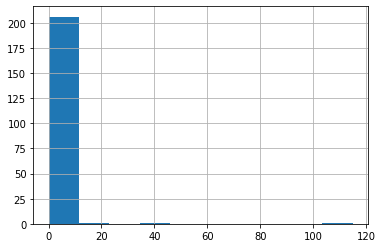

In [21]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count